<a href="https://colab.research.google.com/github/KimGriezmann/DeepLearning_BeTheLegend/blob/master/EDA_hts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hts_data_2018 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv', encoding='euc-kr')
hts_data_2019 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv', encoding = 'euc-kr')
hts_data_2020 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv', encoding = 'euc-kr')
hts_data_2021 = pd.read_csv('/content/drive/MyDrive/bigcontest/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv', encoding = 'euc-kr')

In [5]:
hts_data_2021

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM
0,2021,20210403SSWO0,210403_140101,62415,SS,1,131.70,-5.8,땅볼아웃,144.35,고척
1,2021,20210403SSWO0,210403_140857,74163,WO,1,116.87,18.4,1루타,132.34,고척
2,2021,20210403SSWO0,210403_141459,75125,WO,1,160.00,16.8,2루타,120.78,고척
3,2021,20210403SSWO0,210403_142105,51463,SS,2,160.37,35.2,플라이,142.66,고척
4,2021,20210403SSWO0,210403_142217,75566,SS,2,140.08,33.6,플라이,142.97,고척
...,...,...,...,...,...,...,...,...,...,...,...
17959,2021,20210711LTSS0,210711_195321,50458,SS,8,141.23,-4.9,땅볼아웃,137.76,대구
17960,2021,20210711LTSS0,210711_195424,62415,SS,8,101.09,31.8,1루타,138.51,대구
17961,2021,20210711LTSS0,210711_195627,75566,SS,8,146.84,33.4,홈런,134.10,대구
17962,2021,20210711LTSS0,210711_200047,69418,SS,8,146.12,23.9,홈런,139.96,대구


In [7]:
hts_data_2021.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,17964.0,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2021.0,67633.956468,4.975006,134.391496,17.573859,135.868189
std,0.0,8406.789409,2.573506,19.476600,23.833166,9.126255
min,2021.0,50054.000000,1.000000,27.460000,-56.500000,97.220000
25%,2021.0,62925.000000,3.000000,122.940000,-1.400000,129.420000
50%,2021.0,66965.000000,5.000000,137.835000,14.400000,137.600000
75%,2021.0,75847.000000,7.000000,149.030000,32.100000,142.980000
max,2021.0,79608.000000,12.000000,176.820000,89.500000,155.840000


In [8]:
hts_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GYEAR        17964 non-null  int64  
 1   G_ID         17964 non-null  object 
 2   PIT_ID       17964 non-null  object 
 3   PCODE        17964 non-null  int64  
 4   T_ID         17964 non-null  object 
 5   INN          17964 non-null  int64  
 6   HIT_VEL      17964 non-null  float64
 7   HIT_ANG_VER  17964 non-null  float64
 8   HIT_RESULT   17964 non-null  object 
 9   PIT_VEL      17964 non-null  float64
 10  STADIUM      17964 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.5+ MB


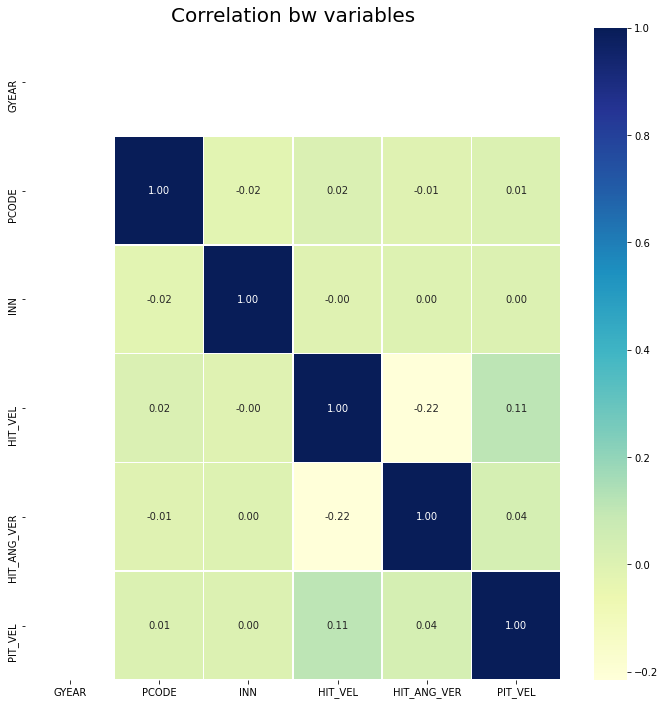

In [12]:
%matplotlib inline
plt.figure(figsize = (12, 12))
sns.heatmap(data = hts_data_2021.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'YlGnBu')
plt.title('Correlation bw variables', fontsize = 20)
plt.show()

In [19]:
result_stadium = hts_data_2021.loc[:, ['HIT_RESULT', 'STADIUM']]

In [20]:
HR_stadium = result_stadium.loc[result_stadium['HIT_RESULT']== '홈런']

In [21]:
HR_stadium

,HIT_RESULT,STADIUM
55,홈런,수원
114,홈런,잠실
122,홈런,창원
162,홈런,문학
176,홈런,문학
...,...,...
17863,홈런,문학
17904,홈런,광주
17956,홈런,대구
17961,홈런,대구


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags

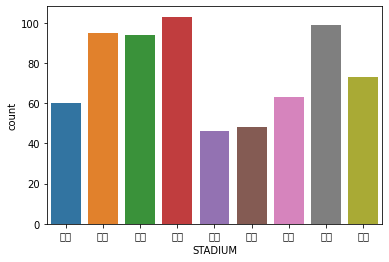

In [22]:
sns.countplot(HR_stadium['STADIUM'])
plt.show()